In [9]:
import numpy as np, glob, os

in_dir = r"D:/Thesis/102109/MNINonLinear/Results/roi_outputs"
out_file = os.path.join(in_dir, "sub-102109_mean_fc_z.npy")

mats = [np.load(f) for f in glob.glob(os.path.join(in_dir, "*_fc_z.npy"))]
mean_fc = np.mean(mats, axis=0)
np.save(out_file, mean_fc)

print("✅ Saved mean FC matrix to:", out_file)


✅ Saved mean FC matrix to: D:/Thesis/102109/MNINonLinear/Results/roi_outputs\sub-102109_mean_fc_z.npy


Shape: (200, 200)
Mean correlation (Fisher z): 0.1805052


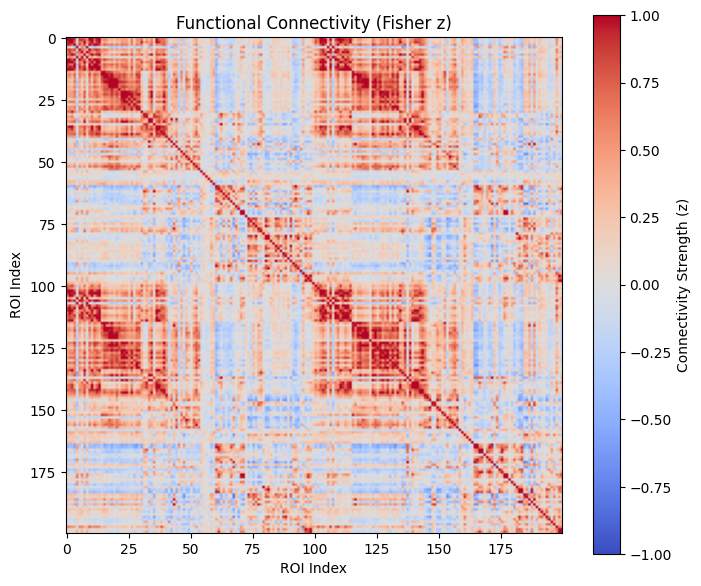

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load your saved FC matrix
fc = np.load(r"D:/Thesis/102008/MNINonLinear/Results/roi_outputs/sub-102008_mean_fc_z.npy")

print("Shape:", fc.shape)
print("Mean correlation (Fisher z):", np.mean(fc))
plt.figure(figsize=(8, 7))
plt.imshow(fc, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Functional Connectivity (Fisher z)")
plt.xlabel("ROI Index")
plt.ylabel("ROI Index")
plt.colorbar(label="Connectivity Strength (z)")
plt.show()


✅ Structural feature matrix loaded: (200, 4)

--- Summary statistics ---
              count          mean          std          min           25%  \
mean_T1       200.0    396.747989   263.600074     0.302828    169.241798   
mean_GMprob   200.0    435.797637   301.748352     0.061849    202.408344   
GM_volume_ml  200.0   2276.560082  1837.230791     0.344029    927.461349   
voxel_count   200.0  15412.970000  6155.021864  2778.000000  10894.500000   

                       50%           75%           max  
mean_T1         369.675171    635.109924    919.595093  
mean_GMprob     362.251266    619.441330   1288.716919  
GM_volume_ml   1886.463806   3064.055298   9026.317383  
voxel_count   14652.500000  18770.750000  33924.000000  


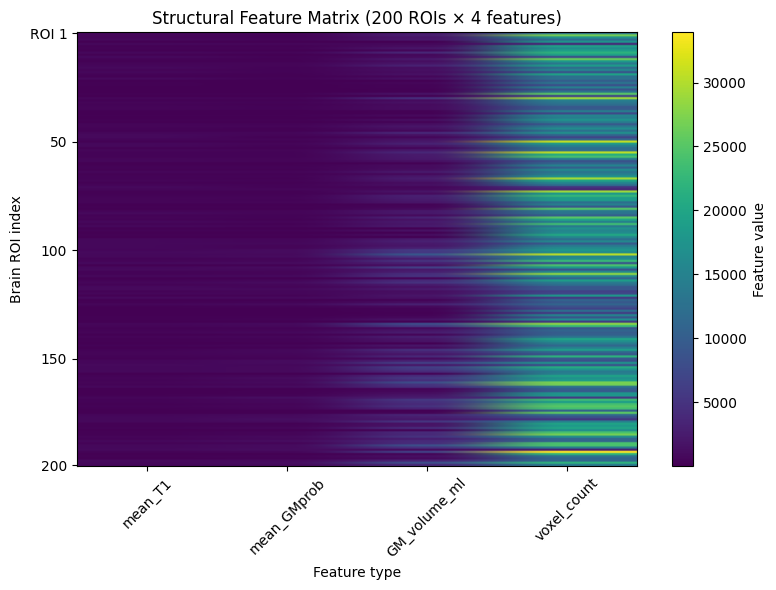

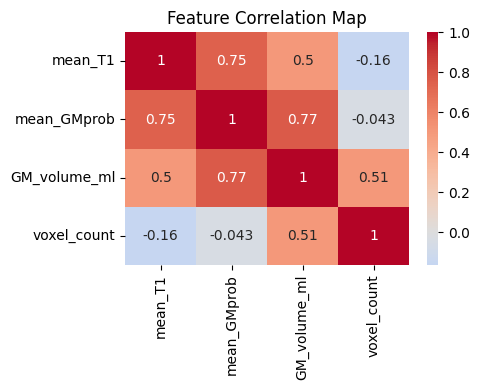


✅ Structural connectivity (sMRI) matrix plotted successfully.


In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# === PATH TO YOUR STRUCTURAL MATRIX ===
sc_path = r"D:/Thesis/101007/101006/MNINonLinear/Results/roi_outputs/T1w_struct_rois.npy"

# === COLUMN NAMES (as saved during feature extraction) ===
cols = ['mean_T1', 'mean_GMprob', 'GM_volume_ml', 'voxel_count']

# === LOAD THE MATRIX ===
sc = np.load(sc_path)  # shape → (200, 4)
print("✅ Structural feature matrix loaded:", sc.shape)

# Convert to DataFrame for convenience
df = pd.DataFrame(sc, columns=cols)

# === 1️⃣ Basic summary ===
print("\n--- Summary statistics ---")
print(df.describe().T)

# === 2️⃣ Plot SC matrix as heatmap ===
plt.figure(figsize=(8, 6))
plt.imshow(sc, aspect='auto', cmap='viridis')
plt.colorbar(label="Feature value")
plt.xticks(range(len(cols)), cols, rotation=45)
plt.yticks([0, 50, 100, 150, 199], ['ROI 1', '50', '100', '150', '200'])
plt.title("Structural Feature Matrix (200 ROIs × 4 features)")
plt.xlabel("Feature type")
plt.ylabel("Brain ROI index")
plt.tight_layout()
plt.show()

# === 3️⃣ Correlation across features ===
plt.figure(figsize=(5, 4))
corr = np.corrcoef(sc.T)
sns.heatmap(corr, annot=True, xticklabels=cols, yticklabels=cols, cmap='coolwarm', center=0)
plt.title("Feature Correlation Map")
plt.tight_layout()
plt.show()

print("\n✅ Structural connectivity (sMRI) matrix plotted successfully.")
